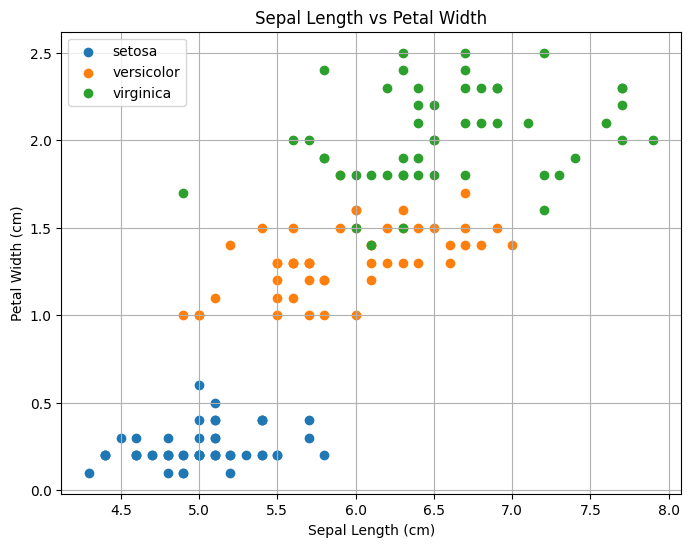

Accuracy of scratch logistic regression model: 0.28888888888888886
Accuracy of scikit-learn logistic regression model: 1.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()

X = iris.data[:, [0, 3]]
y = iris.target

plt.figure(figsize=(8, 6))
for i in range(len(iris.target_names)):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=iris.target_names[i])

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Sepal Length vs Petal Width')
plt.legend()
plt.grid(True)
plt.show()

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_reg_scratch = LogisticRegressionScratch()
log_reg_scratch.fit(X_train, y_train)

y_pred_scratch = log_reg_scratch.predict(X_test)

accuracy_scratch = accuracy_score(y_test, y_pred_scratch)

from sklearn.linear_model import LogisticRegression
log_reg_sklearn = LogisticRegression()
log_reg_sklearn.fit(X_train, y_train)
y_pred_sklearn = log_reg_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print("Accuracy of scratch logistic regression model:", accuracy_scratch)
print("Accuracy of scikit-learn logistic regression model:", accuracy_sklearn)